In [131]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
import sys
sys.path.append('../../')
from pocs.utils import hdr

In [133]:
from astropy import units as u
from astropy import constants as c

In [134]:
#Creating an imager array object
imager_array = hdr.create_imager_array()

In [135]:
#Generating a list of exposure times for the imager array
explist = imager_array.exposure_time_array(minimum_magnitude=10*u.ABmag, name = 'canon_sbig_g', long_exposures=1, factor=2, maximum_exptime = 300 * u.second, maximum_magnitude = 21 * u.ABmag)
print (explist)

[   2.34    4.69    9.38   18.75   37.5    75.    150.    300.    300.
  300.  ] s


In [136]:
#calculates the total exposure time and total elapsed time for a set of exposure times 
imager_array.total_time_calculation(explist, name = 'canon_sbig_g')

(<Quantity 1197.6599999999999 s>, <Quantity 1217.6599999999999 s>)

In [137]:
#calculates the saturation limits corresponding to a set of exposure times
imager_array.saturation_limits(explist, name = 'canon_sbig_g')

[<Quantity 9.505774782560115 mag(AB)>,
 <Quantity 10.260766788387452 mag(AB)>,
 <Quantity 11.013540466377965 mag(AB)>,
 <Quantity 11.76593361352634 mag(AB)>,
 <Quantity 12.519303588600895 mag(AB)>,
 <Quantity 13.273470298011755 mag(AB)>,
 <Quantity 14.029235745346881 mag(AB)>,
 <Quantity 14.788219915037823 mag(AB)>,
 <Quantity 14.788219915037823 mag(AB)>,
 <Quantity 14.788219915037823 mag(AB)>]

/Users/huntsman/anaconda3/lib/python3.5/site-packages/astropy/units/quantity.py:841: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


(<Magnitude [  9.50577478,  9.60577478,  9.70577478,  9.80577478,
               9.90577478, 10.00577478, 10.10577478, 10.20577478,
              10.30577478, 10.40577478, 10.50577478, 10.60577478,
              10.70577478, 10.80577478, 10.90577478, 11.00577478,
              11.10577478, 11.20577478, 11.30577478, 11.40577478,
              11.50577478, 11.60577478, 11.70577478, 11.80577478,
              11.90577478, 12.00577478, 12.10577478, 12.20577478,
              12.30577478, 12.40577478, 12.50577478, 12.60577478,
              12.70577478, 12.80577478, 12.90577478, 13.00577478,
              13.10577478, 13.20577478, 13.30577478, 13.40577478,
              13.50577478, 13.60577478, 13.70577478, 13.80577478,
              13.90577478, 14.00577478, 14.10577478, 14.20577478,
              14.30577478, 14.40577478, 14.50577478, 14.60577478,
              14.70577478, 14.80577478, 14.90577478, 15.00577478,
              15.10577478, 15.20577478, 15.30577478, 15.40577478,
          

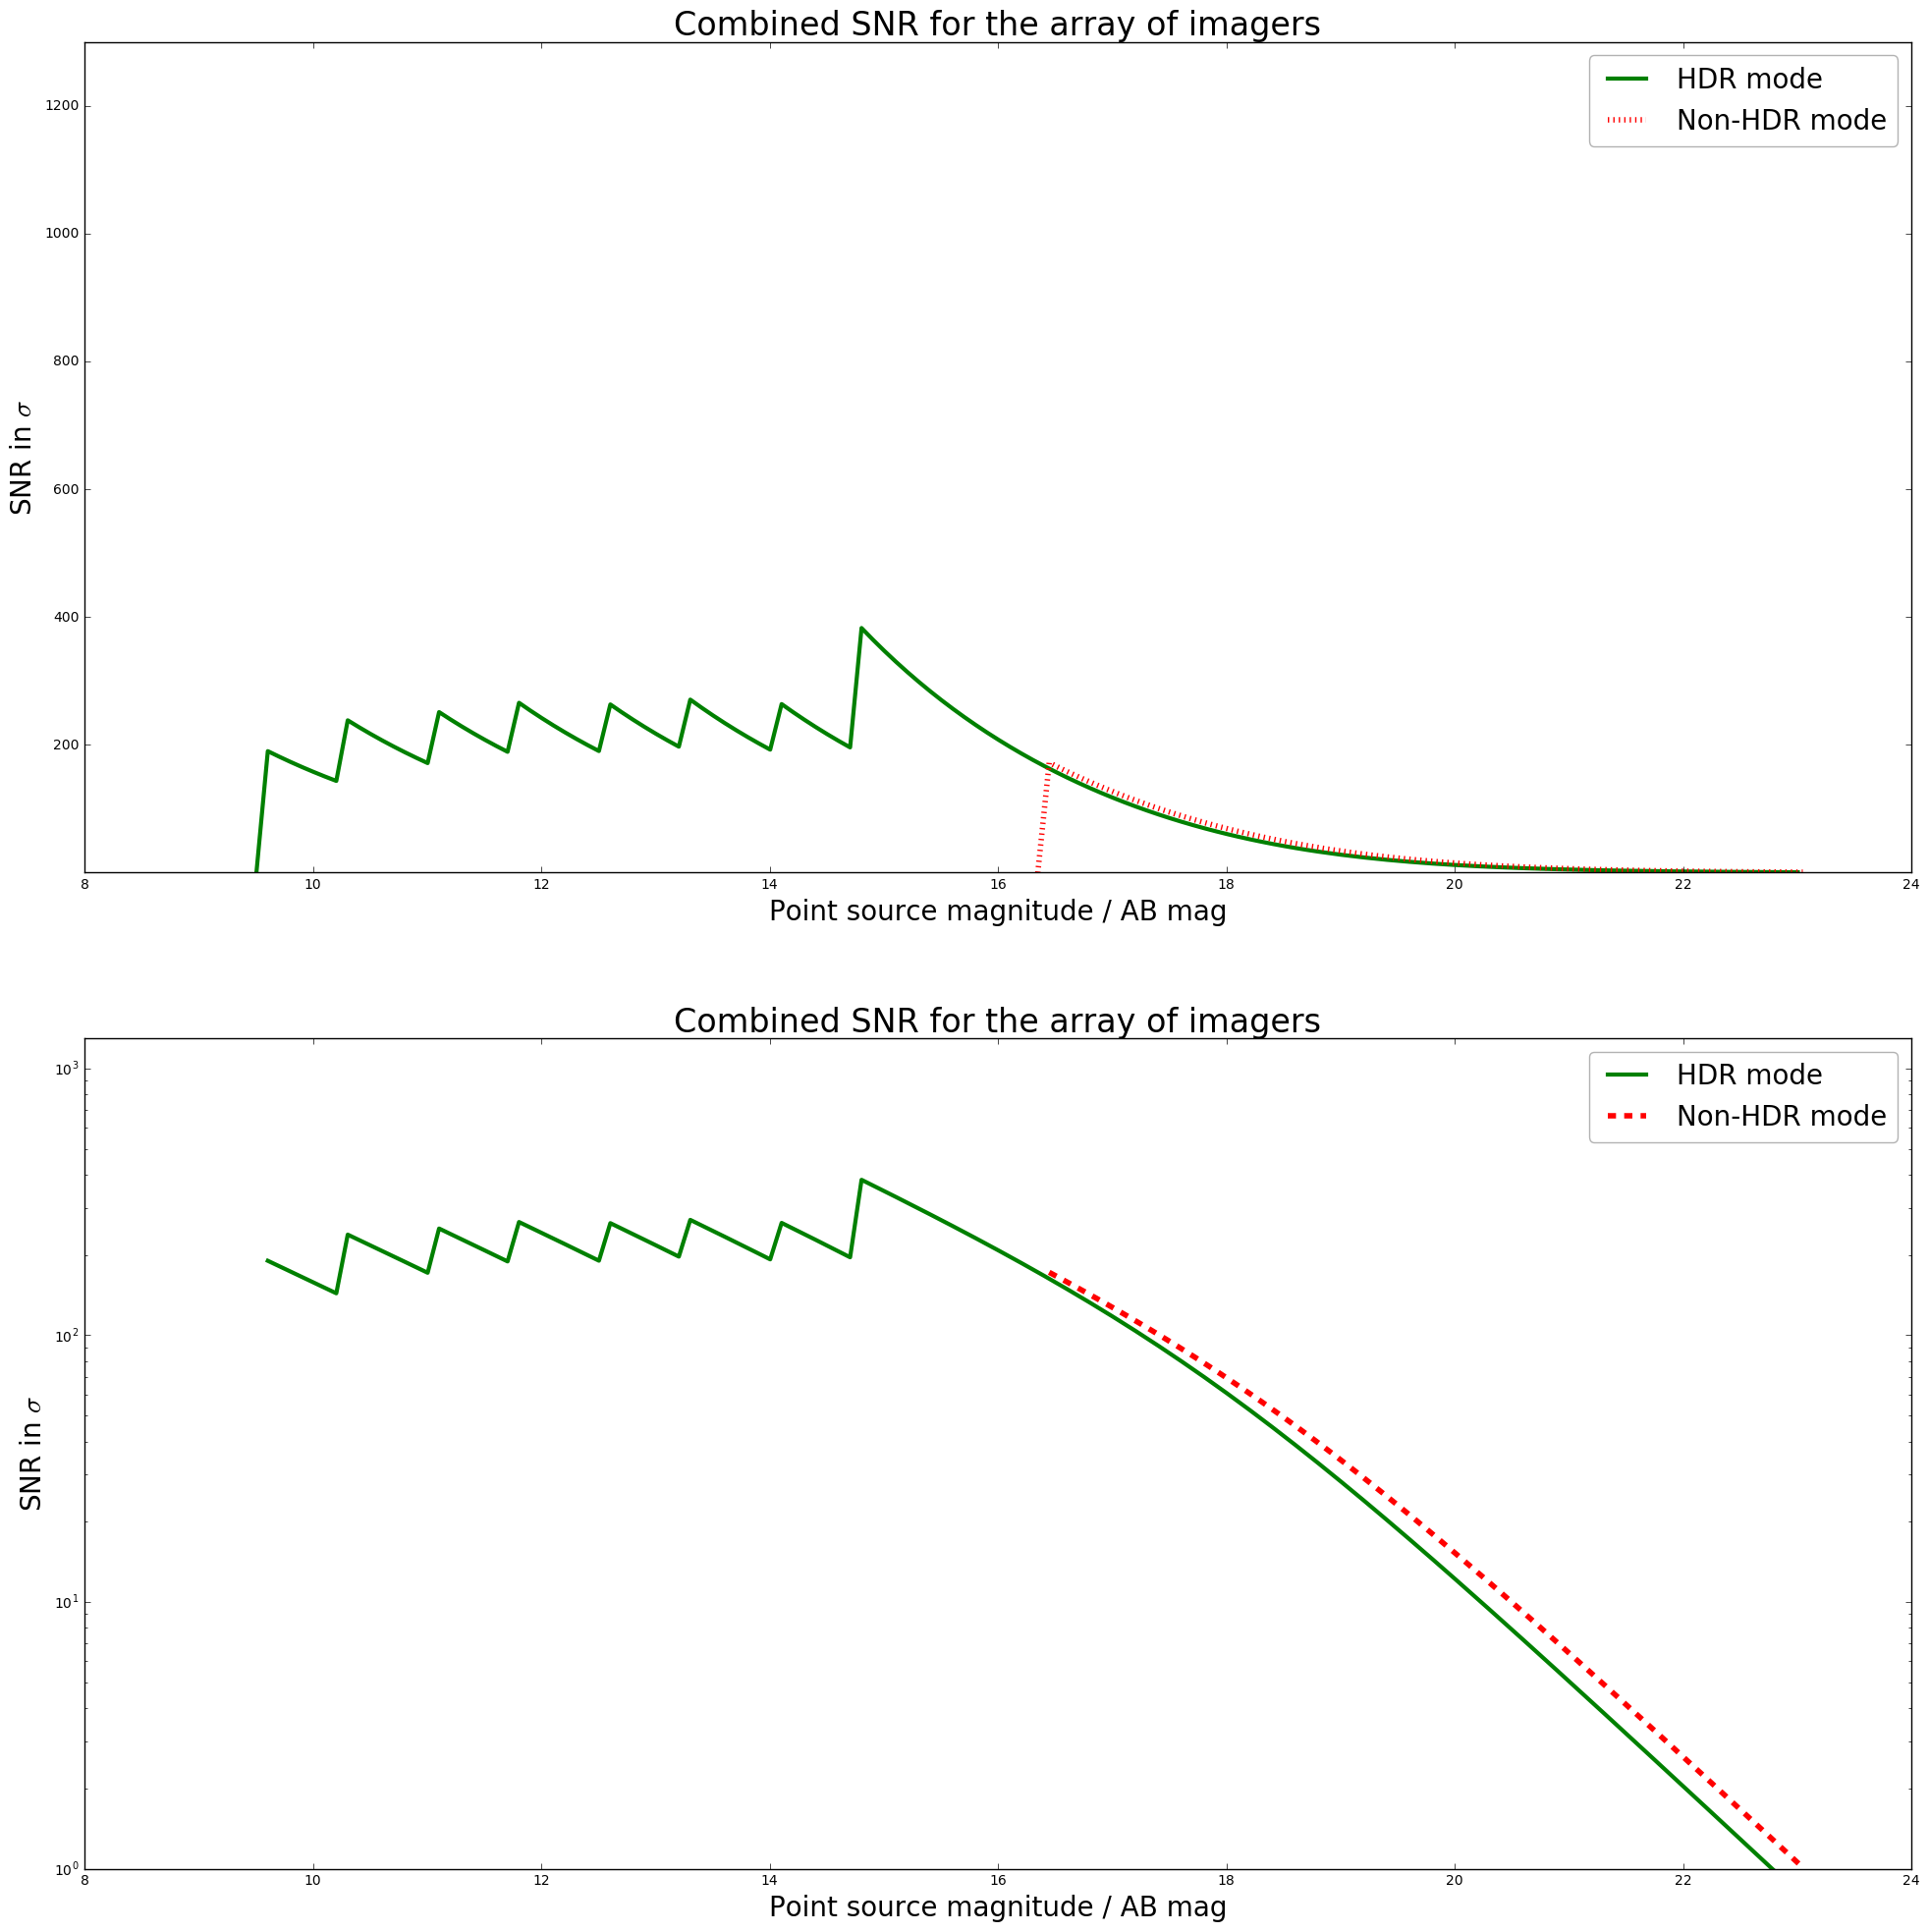

In [138]:
#Generates a plot of SNR versus magnitude for a point source for a HDR mode against a non-HDR mode
%matplotlib inline
imager_array.snr_plot(explist, name = 'canon_sbig_g', generate_plots = True)

/Users/huntsman/anaconda3/lib/python3.5/site-packages/astropy/units/quantity.py:841: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


(<Quantity [   2.34,   4.69,   9.38,  18.75,  37.5 ,  75.  , 150.  ,
             300.  , 300.  , 300.  ] s>,
 [<Quantity 9.505774782560115 mag(AB)>,
  <Quantity 10.260766788387452 mag(AB)>,
  <Quantity 11.013540466377965 mag(AB)>,
  <Quantity 11.76593361352634 mag(AB)>,
  <Quantity 12.519303588600895 mag(AB)>,
  <Quantity 13.273470298011755 mag(AB)>,
  <Quantity 14.029235745346881 mag(AB)>,
  <Quantity 14.788219915037823 mag(AB)>,
  <Quantity 14.788219915037823 mag(AB)>,
  <Quantity 14.788219915037823 mag(AB)>],
 (<Quantity 1197.6599999999999 s>, <Quantity 1217.6599999999999 s>),
 (<Magnitude [  9.50577478,  9.60577478,  9.70577478,  9.80577478,
                9.90577478, 10.00577478, 10.10577478, 10.20577478,
               10.30577478, 10.40577478, 10.50577478, 10.60577478,
               10.70577478, 10.80577478, 10.90577478, 11.00577478,
               11.10577478, 11.20577478, 11.30577478, 11.40577478,
               11.50577478, 11.60577478, 11.70577478, 11.80577478,
          

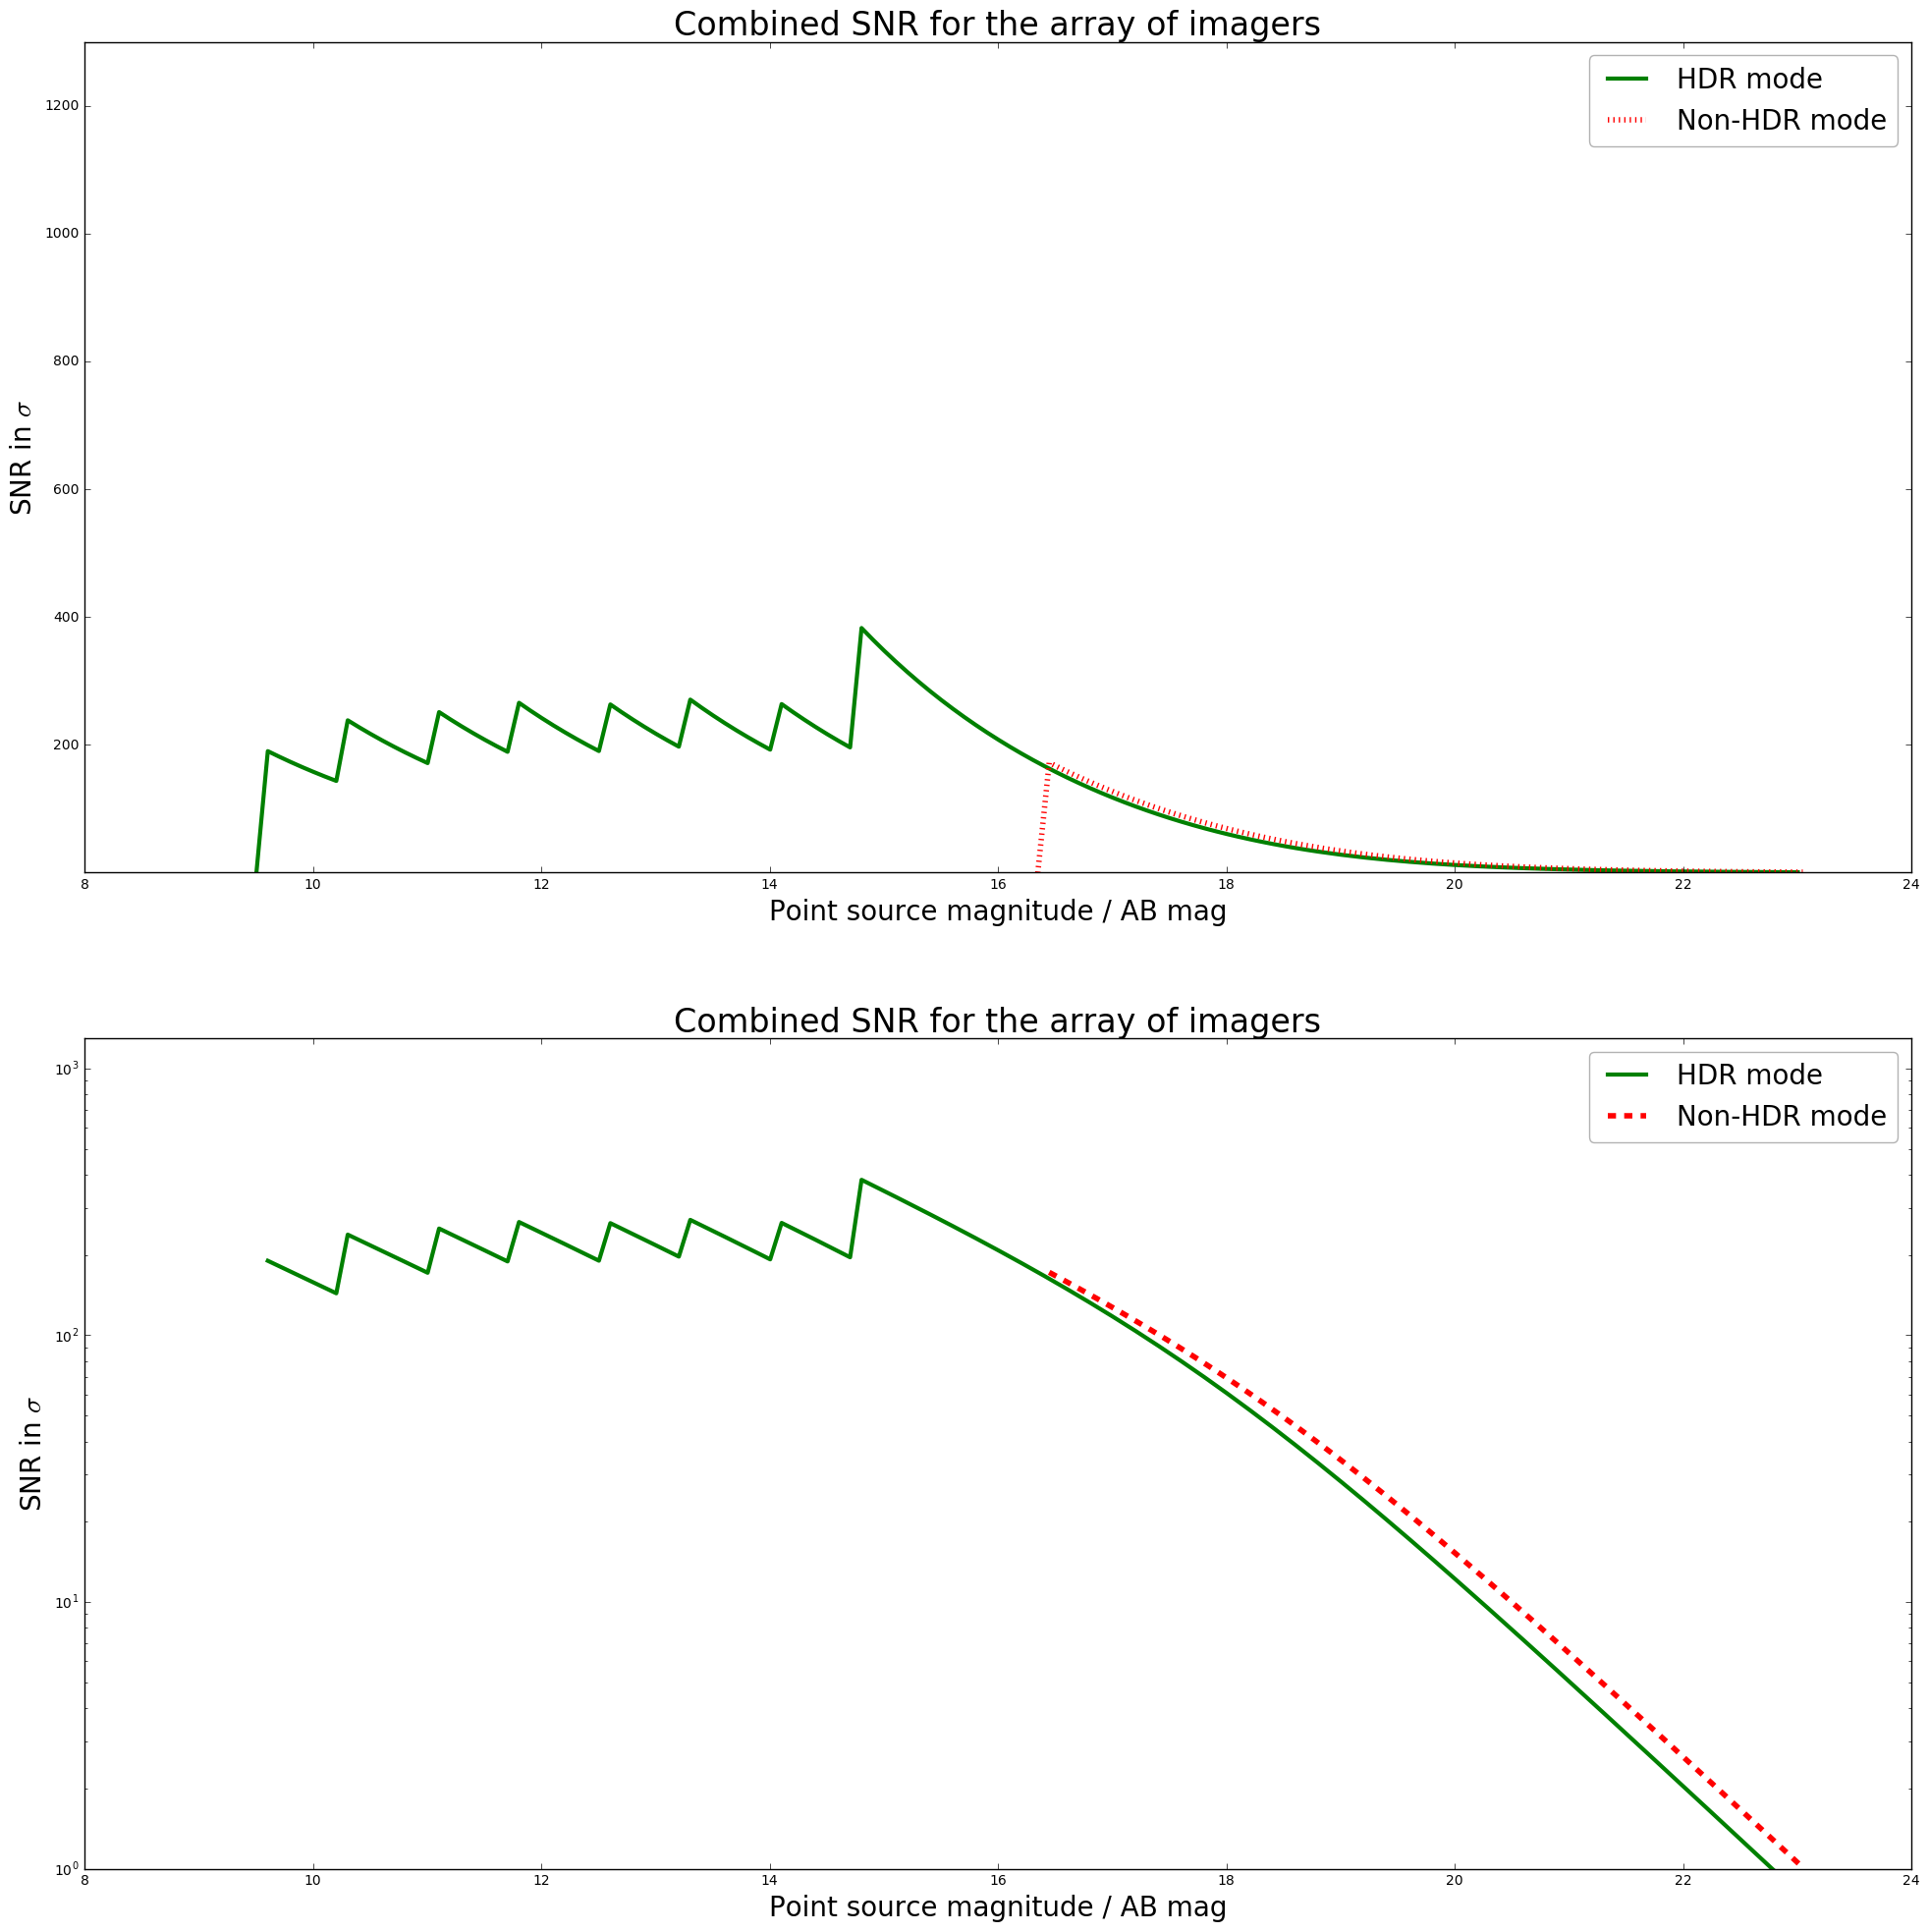

In [140]:
#generates all the information required for an HDR mode
imager_array.HDR_mode(minimum_magnitude=10*u.ABmag, name = 'canon_sbig_g', long_exposures=1, factor=2, maximum_exptime = 300 * u.second, generate_plots = True, maximum_magnitude = 21 * u.ABmag)

In [144]:
#generates a list of dictionaries with each dictionary containing a different target position
from astropy.coordinates import SkyCoord
ra='13 37 00'
dec='-29 51 56.74'
ra_dec1=SkyCoord('%s %s'%(ra, dec), unit=(u.hourangle,u.deg), equinox='J2000', obstime='2014.58')
offset=0.5*u.deg
target_list = hdr.HDR_target_list(ra_dec1, 'betelgeuse', 10*u.ABmag, 'canon_sbig_g', 1, maximum_magnitude=21*u.ABmag)
print (target_list)

[{'position': '13h37m06.5998s -29d50m20.2261s', 'priority': 100, 'epoch': '2014.58', 'visit': {'primary_nexp': 1, 'primary_exptime': 2.34}, 'equinox': 'J2000', 'frame': 'icrs', 'name': 'betelgeuse'}, {'position': '13h38m02.2333s -29d44m08.086s', 'priority': 100, 'epoch': '2014.58', 'visit': {'primary_nexp': 1, 'primary_exptime': 4.69}, 'equinox': 'J2000', 'frame': 'icrs', 'name': 'betelgeuse'}, {'position': '13h37m47.4045s -29d53m27.0853s', 'priority': 100, 'epoch': '2014.58', 'visit': {'primary_nexp': 1, 'primary_exptime': 9.38}, 'equinox': 'J2000', 'frame': 'icrs', 'name': 'betelgeuse'}, {'position': '13h37m52.784s -30d03m49.2989s', 'priority': 100, 'epoch': '2014.58', 'visit': {'primary_nexp': 1, 'primary_exptime': 18.75}, 'equinox': 'J2000', 'frame': 'icrs', 'name': 'betelgeuse'}, {'position': '13h36m56.3116s -29d59m40.9263s', 'priority': 100, 'epoch': '2014.58', 'visit': {'primary_nexp': 1, 'primary_exptime': 37.5}, 'equinox': 'J2000', 'frame': 'icrs', 'name': 'betelgeuse'}, {'pos

In [122]:
import numpy as np
a = np.zeros(5)
a = a * u.electron
print (a ** 2)



[ 0.  0.  0.  0.  0.] electron2
